In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from parser import parse

In [6]:
program = '''
(defn nsum [w]
    (+ (sample (norm 2 1)) w)
)
(defn proc [r t f] 
    (if r t f)
)
(let [v 10
      a (sample (bern 0.1))] 
        (proc a (* (- v a) (nsum 14)) (sample (norm (+ 20 a) 20)))
    )
'''

Generating LALR tables


['r']
['r', 't']


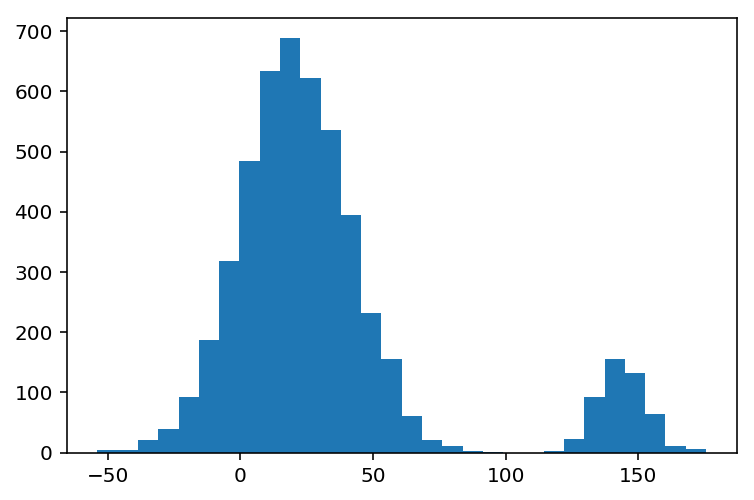

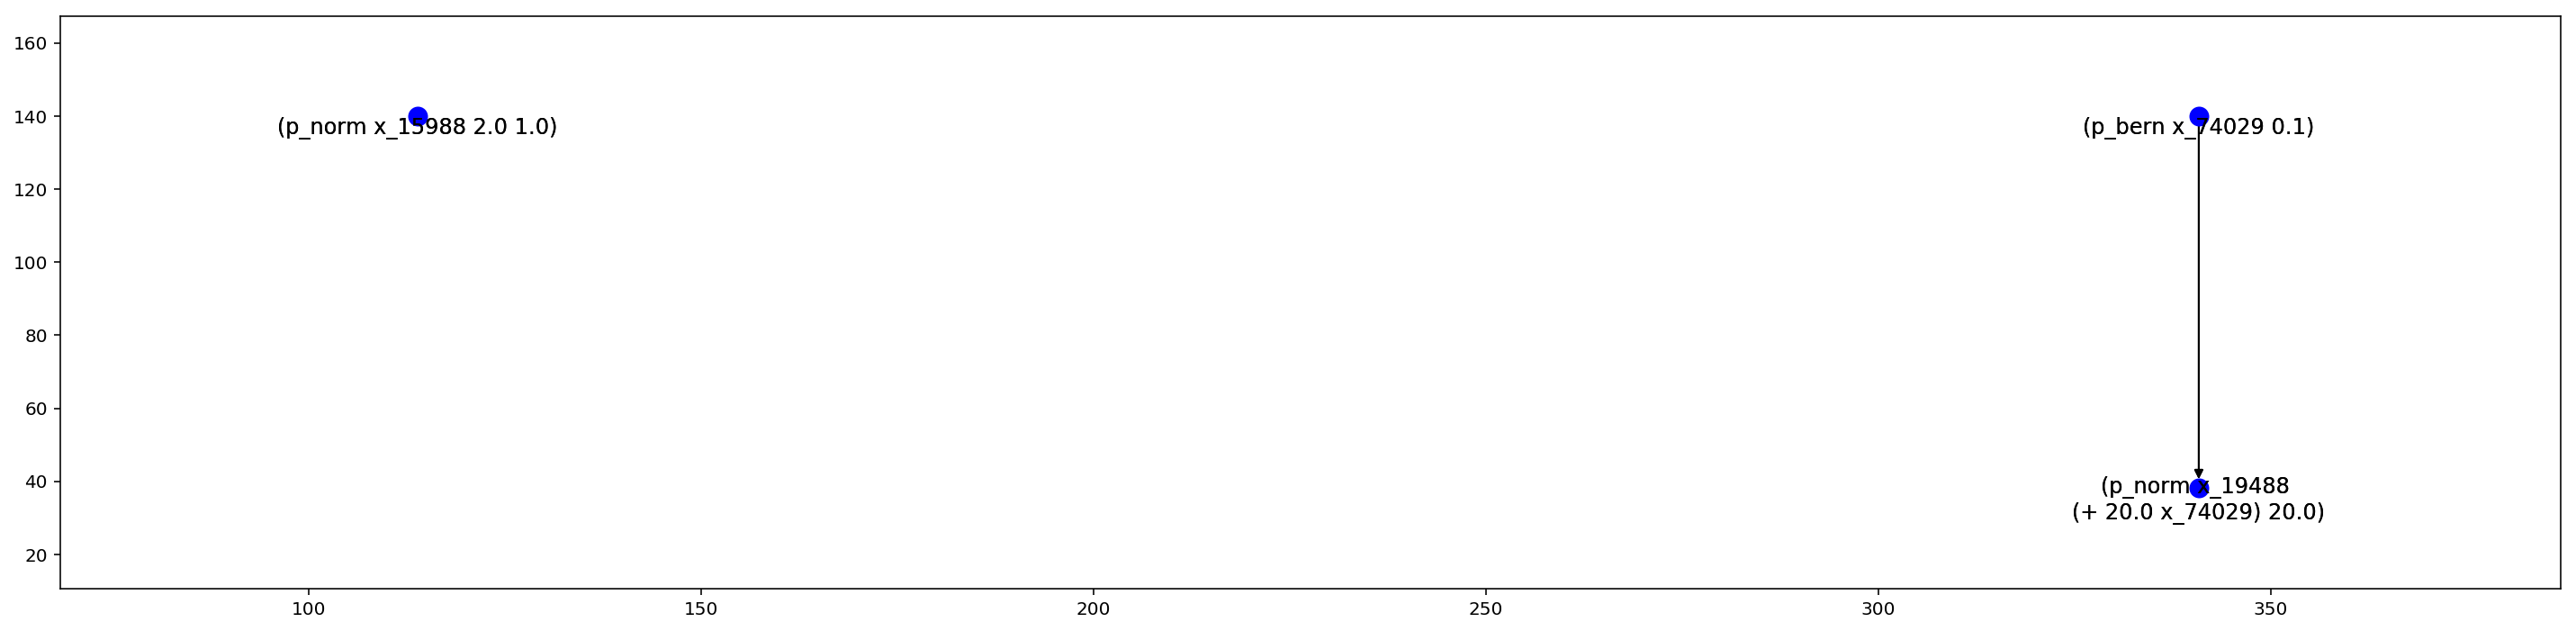

In [7]:
env = parse(program)
nums = [env.run() for _ in range(5000)]
import matplotlib.pyplot as plt
_ = plt.hist(nums, bins=30)

g, e = env.compile()
g.draw()

In [14]:
program = '''
(let [ z (sample (bern 0.8))
       mu (if z (sample (norm 2.0 1.0)) (sample (norm 10.0 1.0)))
       d (norm mu 1.0)
       y 0.5]
    (observe d y)
    (observe d (+ y 4))
    (sample d)
)
'''
env = parse(program)

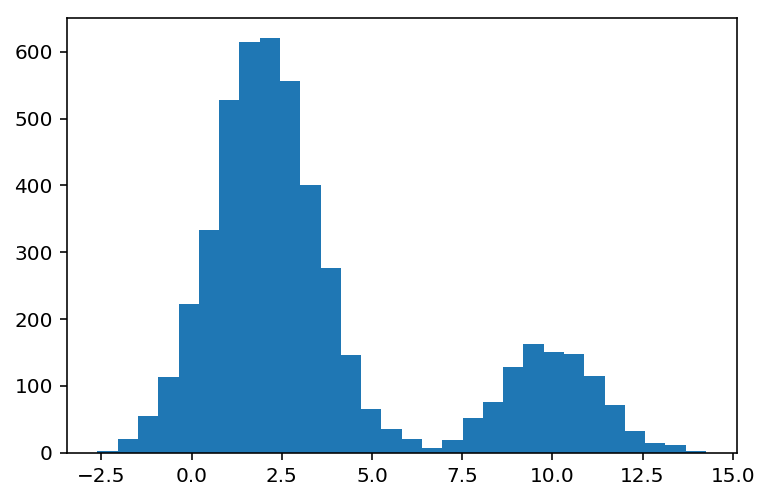

In [15]:
nums = [env.run() for _ in range(5000)]
import matplotlib.pyplot as plt
_ = plt.hist(nums, bins=30)

In [16]:
g, e = env.compile()

In [17]:
for k, v in g.Y.items() :
    print(str(k), str(v))

x_24504 0.5
x_17208 (+ 0.5 4.0)


In [18]:
for k, v in g.P.items() :
    print(str(k), str(v))

x_17523 (p_bern x_17523 0.8)
x_19631 (p_norm x_19631 2.0 1.0)
x_30007 (p_norm x_30007 10.0 1.0)
x_24504 (if True (p_norm x_24504 (if x_17523 x_19631 x_30007) 1.0) 1)
x_17208 (if True (p_norm x_17208 (if x_17523 x_19631 x_30007) 1.0) 1)
x_25778 (p_norm x_25778 (if x_17523 x_19631 x_30007) 1.0)


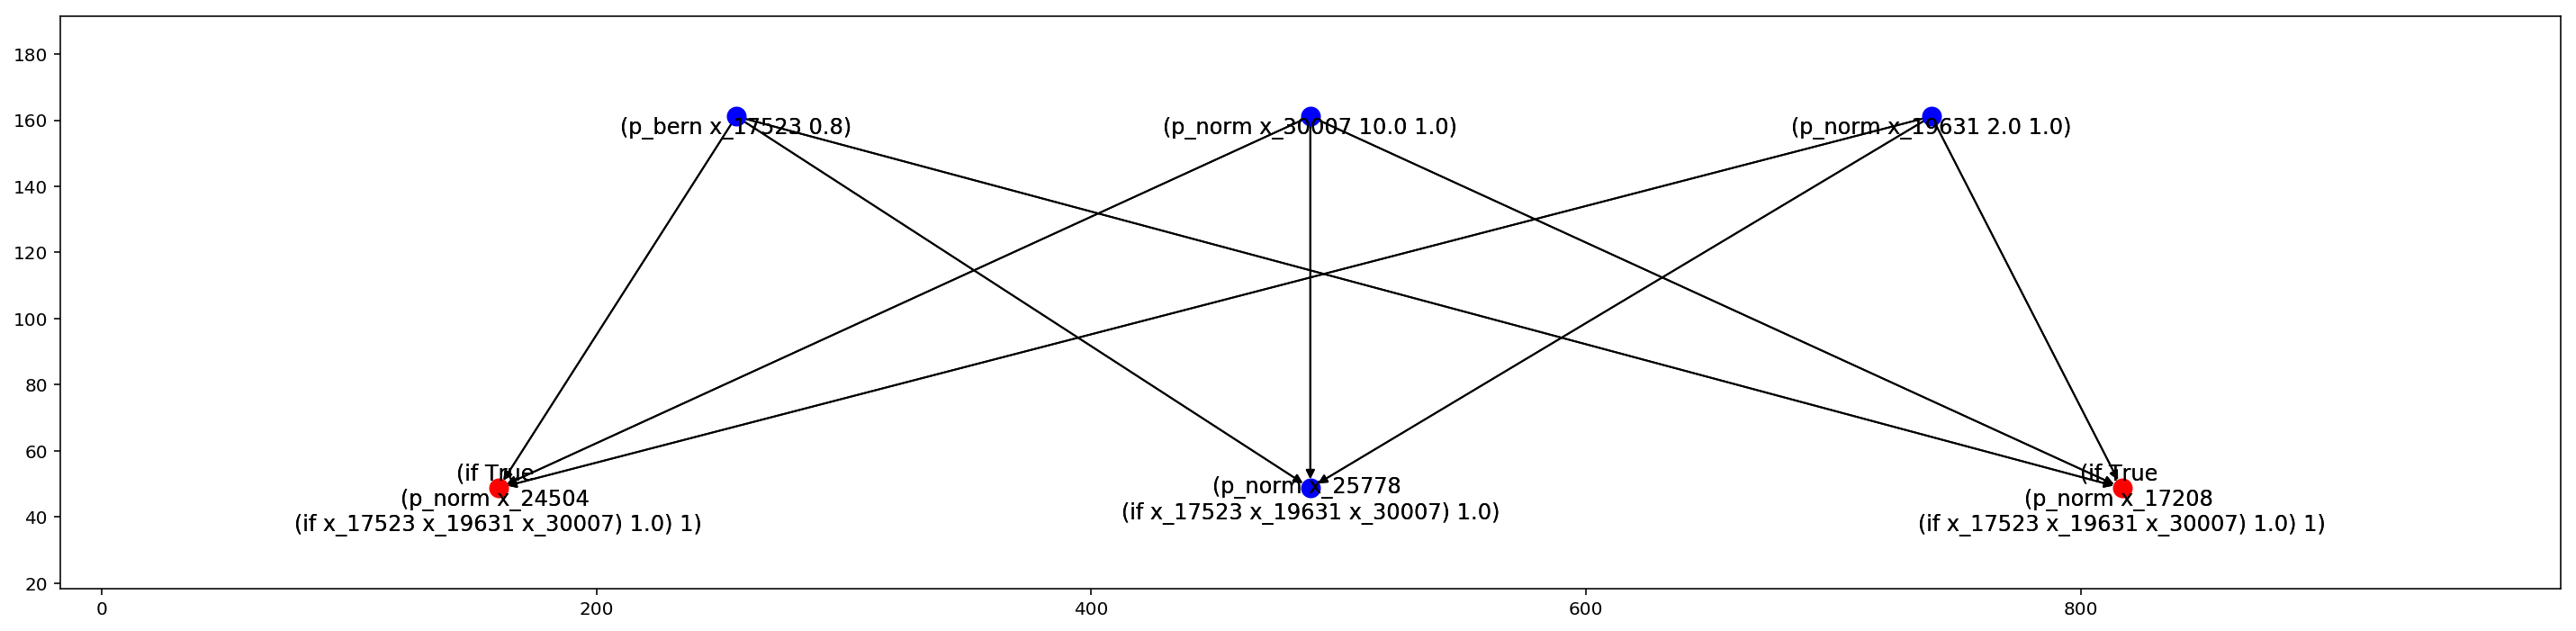

In [19]:
g.draw()